In [3]:
from numpy import *
import matplotlib.pyplot as plt

In [4]:
def loadDataSet():
    dataMatrix = []
    dataLabel = []
    f = open('数据')
    for line in f.readlines():
        # print(line)
        lineList = line.strip().split()
        dataMatrix.append([1, float(lineList[0]), float(lineList[1])])
        dataLabel.append(int(lineList[2]))
    matLabel = mat(dataLabel).transpose()
    return dataMatrix, matLabel

In [5]:
def sigmoid(inX):
    return 1 / (1 + exp(-inX))

In [12]:
def stocGraAscent1(dataMatrix, matLabel):
    m, n = shape(dataMatrix)
    matMatrix = mat(dataMatrix)

    w = ones((n, 1))
    num = 200
    setIndex = set([])
    for i in range(num):
        for j in range(m):
            alpha = 4 / (1 + i + j) + 0.01

            dataIndex = random.randint(0, 100)
            while dataIndex in setIndex:
                setIndex.add(dataIndex)
                dataIndex = random.randint(0, 100)
            error = sigmoid(matMatrix[dataIndex] * w) - matLabel[dataIndex]
            w = w - alpha * matMatrix[dataIndex].transpose() * error
    return w

In [13]:
def draw(weight):
    x0List = []
    y0List = []
    x1List = []
    y1List = []
    f = open('数据.txt', 'r')
    for line in f.readlines():
        lineList = line.strip().split()
        if lineList[2] == '0':
            x0List.append(float(lineList[0]))
            y0List.append(float(lineList[1]))
        else:
            x1List.append(float(lineList[0]))
            y1List.append(float(lineList[1]))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x0List, y0List, s=10, c='red')
    ax.scatter(x1List, y1List, s=10, c='green')

    xList = []
    yList = []
    x = arange(-3, 3, 0.1)
    for i in arange(len(x)):
        xList.append(x[i])

    y = (-weight[0] - weight[1] * x) / weight[2]
    for j in arange(y.shape[1]):
        yList.append(y[0, j])

    ax.plot(xList, yList)
    plt.xlabel('x1');
    plt.ylabel('x2')
    plt.show()

[[14.59015816]
 [ 1.15974949]
 [-1.9381248 ]]


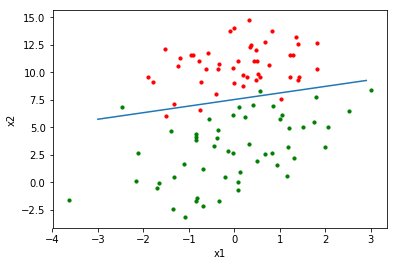

In [14]:
if __name__ == '__main__':
    dataMatrix, matLabel = loadDataSet()
    # weight=graAscent(dataMatrix,matLabel)
    weight = stocGraAscent1(dataMatrix, matLabel)
    print(weight)
    draw(weight)